In [1]:
import matplotlib.pyplot as plt
import pandas as pn

df = pn.read_csv('coches-de-segunda-mano-sample.csv')
print(df[df.columns.tolist()])

                                    url                           company  \
0      e158ae0ca53119ca199c28c36b5c2fcd  9881bcdd5a0ad4733037b3fb25e69c3a   
1      ff267ebb7e700246f47f84f3db660b4b  9881bcdd5a0ad4733037b3fb25e69c3a   
2      de4b02db28ea7786c622b969be10c7c7  9881bcdd5a0ad4733037b3fb25e69c3a   
3      0449972a4d07594acf92e9a7dd28b39c  9881bcdd5a0ad4733037b3fb25e69c3a   
4      12c4fa49bd4fdf23f19ecf396d3f02ef  9881bcdd5a0ad4733037b3fb25e69c3a   
...                                 ...                               ...   
49995  730210734bfbe1d3df878d5df71246f2  9881bcdd5a0ad4733037b3fb25e69c3a   
49996  732b04fb47dd9559dbdcd099c5af484e  9881bcdd5a0ad4733037b3fb25e69c3a   
49997  c10afb53957fb8012707239bdfa66018  9881bcdd5a0ad4733037b3fb25e69c3a   
49998  f74363a6688ba11b71b4d980a959b8d3  9881bcdd5a0ad4733037b3fb25e69c3a   
49999  3d60801ccb96ef038747130e8a34ceda  9881bcdd5a0ad4733037b3fb25e69c3a   

             make            model  \
0            SEAT           Toledo   

In [2]:
columns_to_drop= (['url','company','price_financed','fuel','publish_date','color','doors','dealer','insert_date','kms',
'power','shift','version','photos','is_professional','province','country'])
df = df.drop(columns_to_drop, axis=1)

In [3]:
print(df[df['price'] >= 500000])

              make      model   price    year
29617  LAMBORGHINI  Aventador  549900  2014.0


In [4]:
print(df.head(10))

         make            model  price    year
0        SEAT           Toledo    950  2000.0
1     CITROEN               C1   6200  2017.0
2        FORD  Transit Connect   7851  2016.0
3  VOLKSWAGEN        Caravelle  19426  2014.0
4        FORD          Transit  22850  2017.0
5     PEUGEOT             3008  11490  2016.0
6  LAND-ROVER  Discovery Sport  28500  2017.0
7       HONDA            Civic   8200  2012.0
8     CITROEN         Berlingo  12100  2018.0
9      NISSAN             NOTE   6300  2016.0


In [6]:
#df = df.drop(['country','province','is_professional','photos','version'], axis=1)

In [ ]:
print(df.head(10))

In [8]:
# Calcular la media de la columna "precio" para cada fabricante
media_por_fabricante = df.groupby('make')['price'].mean()
# Imprimir la media
print("La media de los precios de:", media_por_fabricante)

La media de los precios de: make
ABARTH          19098.333333
ALFA ROMEO      13815.427152
ALPINE          66000.000000
ARO              1000.000000
ASTON MARTIN    89578.666667
                    ...     
TOYOTA          12836.858515
UMM              8000.000000
VAZ               500.000000
VOLKSWAGEN      13140.105104
VOLVO           21005.614824
Name: price, Length: 75, dtype: float64


In [9]:
# Calculamos la media del precio por fabricante y año
media_precio_por_fabricante_y_año = df.groupby(['year', 'make'])['price'].mean()

# Reiniciamos el índice para que 'año' y 'fabricante' vuelvan a ser columnas
media_precio_por_fabricante_y_año = media_precio_por_fabricante_y_año.reset_index()

# Calculamos la media de los precios de fabricante por año
media_precio_fabricante_por_año = media_precio_por_fabricante_y_año.groupby('year')['price'].mean()

# Imprimimos la media de los precios de fabricante por año
print("Media de los precios de fabricante por año:")
print(media_precio_fabricante_por_año)

Media de los precios de fabricante por año:
year
1970.0     2500.000000
1971.0     9500.000000
1972.0     4480.000000
1973.0     2575.000000
1974.0     3275.000000
1975.0     4275.000000
1976.0     6000.000000
1977.0     2500.000000
1979.0     1150.000000
1980.0     4433.333333
1981.0     6775.000000
1982.0     6653.583333
1983.0    11716.666667
1984.0     8660.925926
1985.0     8364.957143
1986.0     6644.080556
1987.0     2917.454861
1988.0     6803.098958
1989.0     7507.152256
1990.0     7059.142452
1991.0     9504.641667
1992.0     9445.171429
1993.0     6274.272453
1994.0     5184.308571
1995.0     8062.639018
1996.0     7161.050667
1997.0     6176.917232
1998.0     5676.779801
1999.0     5167.776959
2000.0     6480.442738
2001.0     4354.592634
2002.0     4006.253131
2003.0     4731.740155
2004.0     5780.773834
2005.0     9491.137297
2006.0    11064.454118
2007.0    11299.493937
2008.0    12585.774663
2009.0    11596.156371
2010.0    17557.384634
2011.0    16505.260806
2012.0  

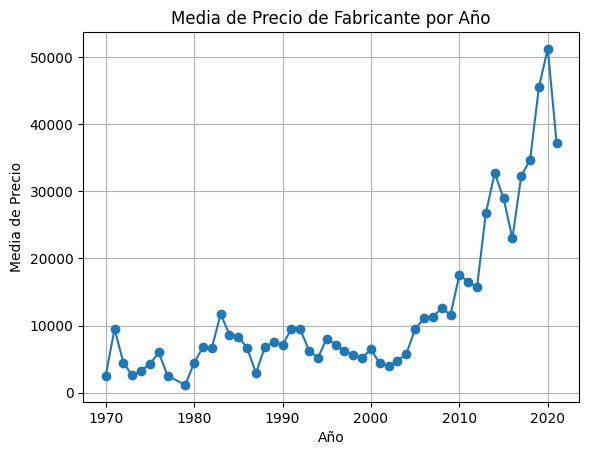

In [10]:


# Graficamos la media de los precios de fabricante por año
plt.plot(media_precio_fabricante_por_año.index, 
         media_precio_fabricante_por_año.values, 
         marker='o')

# Añadimos etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Media de Precio')
plt.title('Media de Precio de Fabricante por Año')

# Mostramos la gráfica
plt.grid(True)
plt.show()


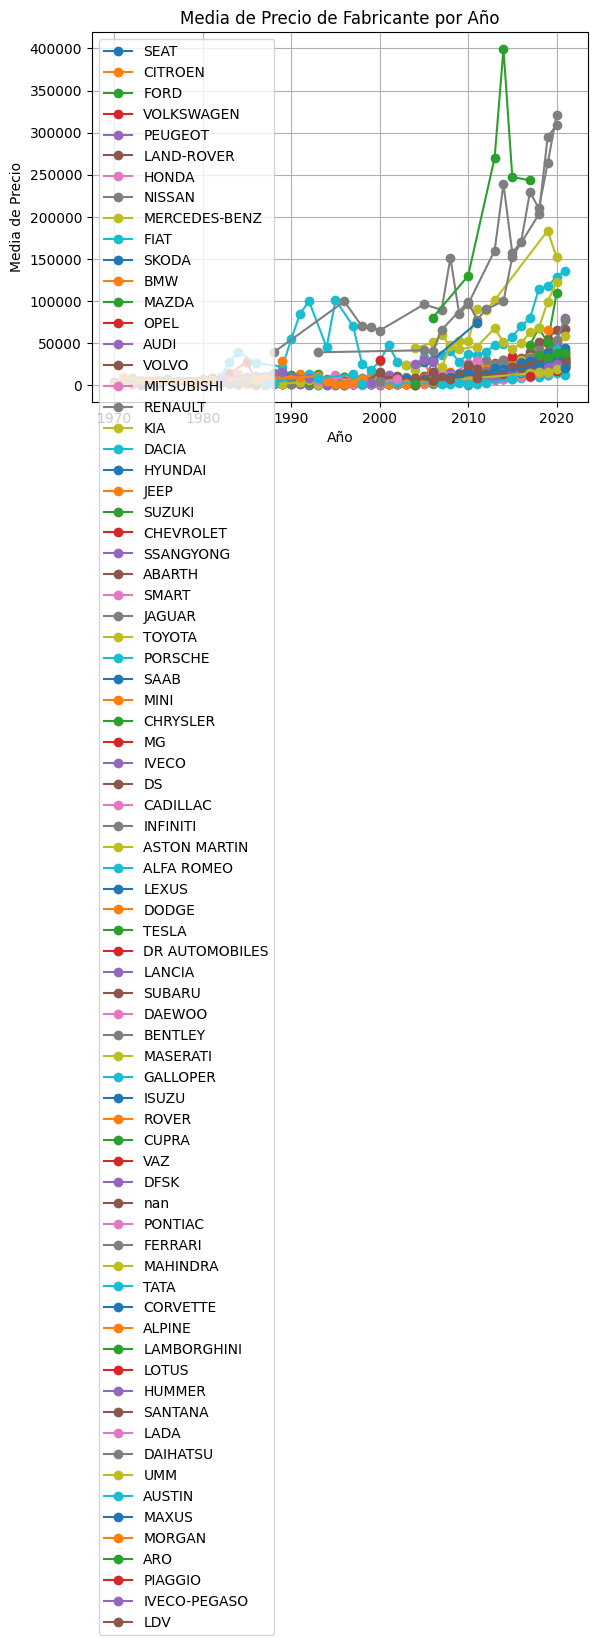

In [11]:
# Graficamos la media de los precios de fabricante por año
for make in df['make'].unique():
    data = media_precio_por_fabricante_y_año[media_precio_por_fabricante_y_año['make'] == make]
    plt.plot(data['year'], data['price'], marker='o', label=make)

# Añadimos etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Media de Precio')
plt.title('Media de Precio de Fabricante por Año')

# Añadimos la leyenda
plt.legend()

# Mostramos la gráfica
plt.grid(True)
plt.show()

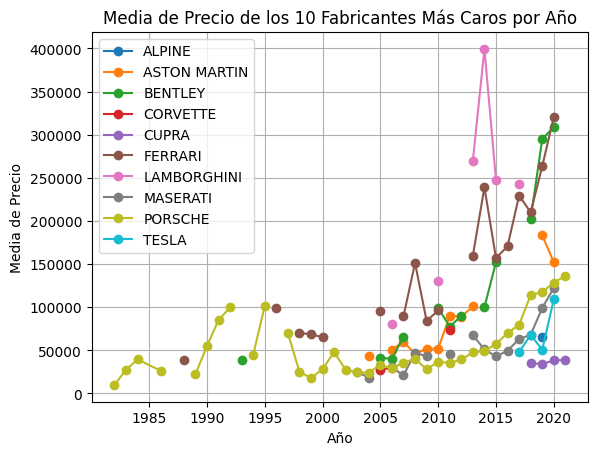

In [12]:
# Calculamos la media del precio por fabricante
media_precio_por_fabricante = df.groupby('make')['price'].mean()

# Seleccionamos los 10 fabricantes más caros
top_10_fabricantes = media_precio_por_fabricante.nlargest(10)

# Filtramos los datos para incluir solo los precios medios de los 10 fabricantes más caros
media_precio_por_fabricante_top_10 = media_precio_por_fabricante.loc[top_10_fabricantes.index]

# Calculamos la media de los precios de fabricante por año solo para los 10 fabricantes más caros
media_precio_fabricante_top_10_por_año = df[df['make'].isin(top_10_fabricantes.index)].groupby(['year', 'make'])['price'].mean().unstack()

# Graficamos la media de los precios de fabricante por año para los 10 fabricantes más caros
for fabricante in media_precio_fabricante_top_10_por_año.columns:
    plt.plot(media_precio_fabricante_top_10_por_año.index, media_precio_fabricante_top_10_por_año[fabricante], marker='o', label=fabricante)

# Añadimos etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Media de Precio')
plt.title('Media de Precio de los 10 Fabricantes Más Caros por Año')

# Añadimos la leyenda
plt.legend()

# Mostramos la gráfica
plt.grid(True)
plt.show()

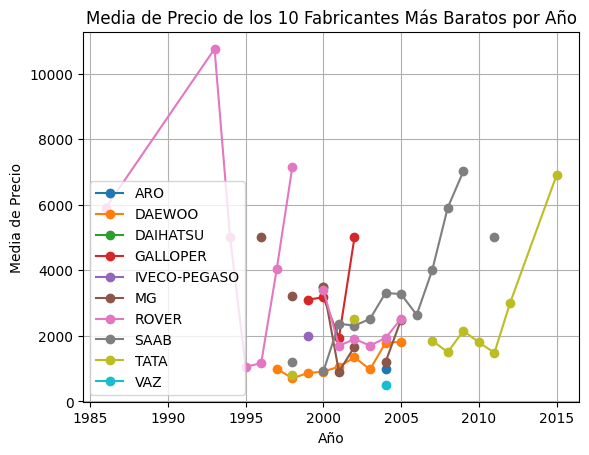

In [13]:


# Calculamos la media del precio por fabricante
media_precio_por_fabricante = df.groupby('make')['price'].mean()

# Seleccionamos los 10 fabricantes más caros
top_10_fabricantes = media_precio_por_fabricante.nsmallest(10)

# Filtramos los datos para incluir solo los precios medios de los 10 fabricantes más caros
media_precio_por_fabricante_top_10 = media_precio_por_fabricante.loc[top_10_fabricantes.index]

# Calculamos la media de los precios de fabricante por año solo para los 10 fabricantes más caros
media_precio_fabricante_top_10_por_año = df[df['make'].isin(top_10_fabricantes.index)].groupby(['year', 'make'])['price'].mean().unstack()

# Graficamos la media de los precios de fabricante por año para los 10 fabricantes más caros
for fabricante in media_precio_fabricante_top_10_por_año.columns:
    plt.plot(media_precio_fabricante_top_10_por_año.index, media_precio_fabricante_top_10_por_año[fabricante], marker='o', label=fabricante)

# Añadimos etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Media de Precio')
plt.title('Media de Precio de los 10 Fabricantes Más Baratos por Año')

# Añadimos la leyenda
plt.legend()

# Mostramos la gráfica
plt.grid(True)
plt.show()

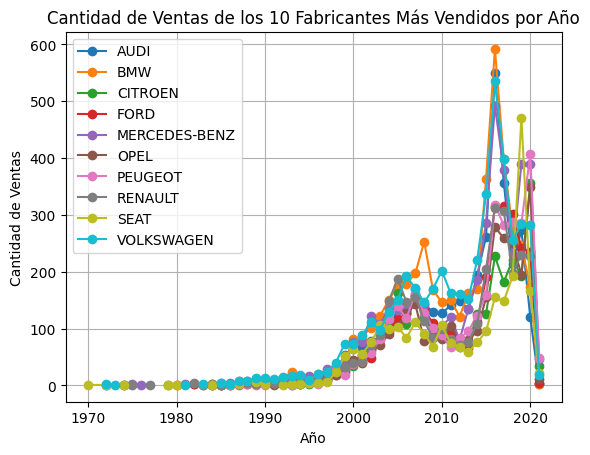

In [14]:
#los 10 mas vendidos


# Calculamos el número de ventas por fabricante
ventas_por_fabricante = df['make'].value_counts()

# Seleccionamos los 10 fabricantes más vendidos
top_10_fabricantes_vendidos = ventas_por_fabricante.nlargest(10)

# Filtramos los datos para incluir solo los fabricantes más vendidos
df_top_10_fabricantes_vendidos = df[df['make'].isin(top_10_fabricantes_vendidos.index)]

# Calculamos la cantidad de ventas de cada fabricante por año
ventas_por_fabricante_y_año = df_top_10_fabricantes_vendidos.groupby(['year', 'make']).size().unstack()

# Graficamos la cantidad de ventas de cada fabricante por año para los 10 más vendidos
for fabricante in ventas_por_fabricante_y_año.columns:
    plt.plot(ventas_por_fabricante_y_año.index, ventas_por_fabricante_y_año[fabricante], marker='o', label=fabricante)

# Añadimos etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de Ventas')
plt.title('Cantidad de Ventas de los 10 Fabricantes Más Vendidos por Año')

# Añadimos la leyenda
plt.legend()

# Mostramos la gráfica
plt.grid(True)
plt.show()


In [ ]:


# Filtramos los datos solo para el año 2020
df_2020 = df[df['year'] == 2019]

# Calculamos el número de ventas por fabricante para el año 2020
ventas_por_fabricante_2020 = df_2020['make'].value_counts()

# Seleccionamos los 10 fabricantes más vendidos para el año 2020
top_10_fabricantes_vendidos_2020 = ventas_por_fabricante_2020.nlargest(10)

# Filtramos los datos para incluir solo los fabricantes más vendidos para el año 2020
df_top_10_fabricantes_vendidos_2020 = df_2020[df_2020['make'].isin(top_10_fabricantes_vendidos_2020.index)]

# Calculamos la cantidad de ventas de cada fabricante por año para el año 2020
ventas_por_fabricante_y_año_2020 = df_top_10_fabricantes_vendidos_2020.groupby(['year', 'make']).size().unstack()

# Graficamos la cantidad de ventas de cada fabricante por año para los 10 más vendidos en 2020
for fabricante in ventas_por_fabricante_y_año_2020.columns:
    plt.plot(ventas_por_fabricante_y_año_2020.index, ventas_por_fabricante_y_año_2020[fabricante], marker='o', label=fabricante)

# Añadimos etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de Ventas')
plt.title('Cantidad de Ventas de los 10 Fabricantes Más Vendidos en 2020')

# Añadimos la leyenda
plt.legend()

# Mostramos la gráfica
plt.grid(True)
plt.show()


In [ ]:

# Filtramos los datos solo para el año 2020
df_2020 = df[df['year'] == 2019]

# Calculamos el número de ventas por fabricante para el año 2020
ventas_por_fabricante_2020 = df_2020['make'].value_counts()

# Seleccionamos los 10 fabricantes más vendidos para el año 2020
top_10_fabricantes_vendidos_2020 = ventas_por_fabricante_2020.nsmallest(10)

# Filtramos los datos para incluir solo los fabricantes más vendidos para el año 2020
df_top_10_fabricantes_vendidos_2020 = df_2020[df_2020['make'].isin(top_10_fabricantes_vendidos_2020.index)]

# Calculamos la cantidad de ventas de cada fabricante por año para el año 2020
ventas_por_fabricante_y_año_2020 = df_top_10_fabricantes_vendidos_2020.groupby(['year', 'make']).size().unstack()

# Graficamos la cantidad de ventas de cada fabricante por año para los 10 más vendidos en 2020
for fabricante in ventas_por_fabricante_y_año_2020.columns:
    plt.plot(ventas_por_fabricante_y_año_2020.index, ventas_por_fabricante_y_año_2020[fabricante], marker='o', label=fabricante)

# Añadimos etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de Ventas')
plt.title('Cantidad de Ventas de los 10 Fabricantes Menos Vendidos en 2020')

# Añadimos la leyenda
plt.legend()

# Mostramos la gráfica
plt.grid(True)
plt.show()

In [ ]:
# Fabricante específico que quieres visualizar
fabricante = 'AUDI'

# Filtramos los datos solo para el fabricante específico
df_fabricante_especifico = df[df['make'] == fabricante]

# Calculamos la cantidad de ventas de ese fabricante por año
ventas_por_año_fabricante_especifico = df_fabricante_especifico.groupby('year')['price'].sum()

# Graficamos las ventas del fabricante específico por año
plt.plot(ventas_por_año_fabricante_especifico.index, ventas_por_año_fabricante_especifico.values, marker='o')

# Añadimos etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title(f'Ventas del Fabricante {fabricante} por Año')

# Mostramos la gráfica
plt.grid(True)
plt.show()